In [2]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

In [5]:
import matplotlib.pyplot as plt

import tensorflow as tf
import numpy as np

In [8]:
sess = tf.InteractiveSession()

In [13]:
x = tf.linspace(-3*np.pi, 3*np.pi, 100)

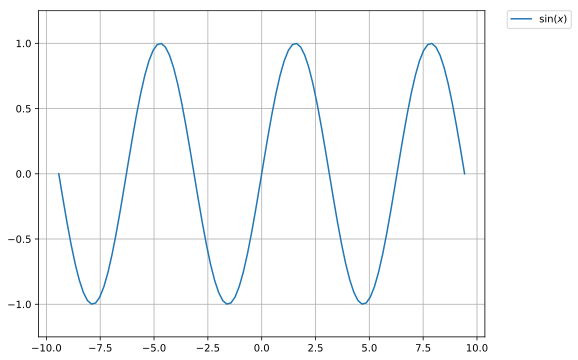

In [38]:
fig, ax = plt.subplots(figsize=(8, 6))

ax.grid(True)
ax.set_ylim((-1.25, 1.25))
 
ax.plot(x.eval(), tf.sin(x).eval(), label="$\sin{(x)}$")

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.show()

In [20]:
tf.sin(x).get_shape()

TensorShape([Dimension(100)])

In [22]:
tf.shape(tf.sin(x)).eval()

array([100], dtype=int32)

In [23]:
tf.size(tf.sin(x)).eval()

100

In [24]:
tf.rank(tf.sin(x)).eval()

1

In [36]:
tf.gradients(tf.sin(x), x)[0].eval()

array([-1.        , -0.98192877, -0.92836785, -0.84125364, -0.72373378,
       -0.58005697, -0.41541538, -0.2357588 , -0.04758216,  0.14231469,
        0.32706791,  0.5       ,  0.65486079,  0.78605294,  0.88883561,
        0.95949292,  0.99547195,  0.99547189,  0.95949304,  0.88883531,
        0.78605318,  0.65486073,  0.49999991,  0.32706779,  0.14231457,
       -0.04758181, -0.23575892, -0.41541508, -0.58005702, -0.72373426,
       -0.84125352, -0.92836791, -0.98192871, -1.        , -0.98192865,
       -0.92836797, -0.84125352, -0.72373402, -0.58005679, -0.41541478,
       -0.23575909, -0.04758198,  0.14231487,  0.32706764,  0.50000018,
        0.65486062,  0.7860533 ,  0.88883543,  0.95949316,  0.99547195,
        0.99547195,  0.95949286,  0.88883543,  0.78605276,  0.65486062,
        0.50000018,  0.32706764,  0.14231487, -0.04758246, -0.23575909,
       -0.41541478, -0.5800572 , -0.72373402, -0.84125382, -0.92836797,
       -0.98192865, -1.        , -0.98192871, -0.92836773, -0.84

In [42]:
tf.gradients(tf.sin(x), x)[0].eval()

array([-1.        , -0.98192877, -0.92836785, -0.84125364, -0.72373378,
       -0.58005697, -0.41541538, -0.2357588 , -0.04758216,  0.14231469,
        0.32706791,  0.5       ,  0.65486079,  0.78605294,  0.88883561,
        0.95949292,  0.99547195,  0.99547189,  0.95949304,  0.88883531,
        0.78605318,  0.65486073,  0.49999991,  0.32706779,  0.14231457,
       -0.04758181, -0.23575892, -0.41541508, -0.58005702, -0.72373426,
       -0.84125352, -0.92836791, -0.98192871, -1.        , -0.98192865,
       -0.92836797, -0.84125352, -0.72373402, -0.58005679, -0.41541478,
       -0.23575909, -0.04758198,  0.14231487,  0.32706764,  0.50000018,
        0.65486062,  0.7860533 ,  0.88883543,  0.95949316,  0.99547195,
        0.99547195,  0.95949286,  0.88883543,  0.78605276,  0.65486062,
        0.50000018,  0.32706764,  0.14231487, -0.04758246, -0.23575909,
       -0.41541478, -0.5800572 , -0.72373402, -0.84125382, -0.92836797,
       -0.98192865, -1.        , -0.98192871, -0.92836773, -0.84

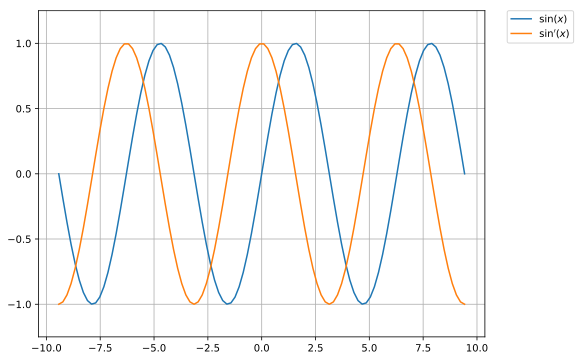

In [41]:
fig, ax = plt.subplots(figsize=(8, 6))

ax.grid(True)
ax.set_ylim((-1.25, 1.25))
 
ax.plot(x.eval(), tf.sin(x).eval(), label="$\sin{(x)}$")
ax.plot(x.eval(), tf.gradients(tf.sin(x), x)[0].eval(), label="$\sin'{(x)}$")

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.show()

In [54]:
@np.vectorize
def sin(x, max_tol=1e-20):

    res = curr = x
    n = 2

    while np.abs(curr) > max_tol:
        curr *= -x**2
        curr /= n*(n+1)
        res += curr
        n += 2
        
    return res

In [55]:
x = np.linspace(-3*np.pi, 3*np.pi, 100)

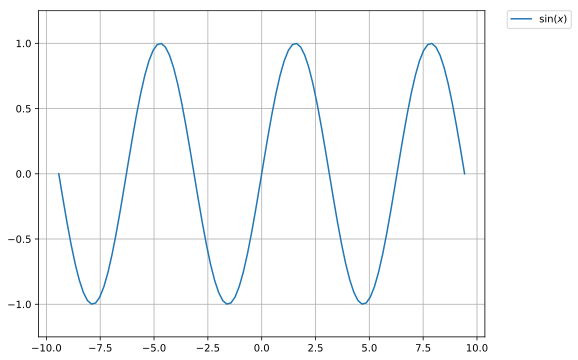

In [56]:
fig, ax = plt.subplots(figsize=(8, 6))

ax.grid(True)
ax.set_ylim((-1.25, 1.25))
 
ax.plot(x, sin(x), label="$\sin{(x)}$")

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.show()

In [75]:
def sin(x, max_tol=1e-20):

    res = curr = x
    n = 2

    while tf.greater(tf.abs(curr), max_tol):
        curr *= -x**2
        curr /= n*(n+1)
        res += curr
        n += 2

    return res

In [100]:
cond = lambda x, max_tol, curr, i, res: tf.greater(tf.abs(curr), max_tol)
def body(x, max_tol, curr, i, res):
    curr *= -x**2
    curr /= tf.to_float(i*(i+1))
    res += curr
    i += 2
    return x, max_tol, curr, i, res
r = tf.while_loop(cond, 
                  body, 
                  [tf.linspace(-3*np.pi, 3*np.pi, 100), 
                   tf.constant(1e-20, dtype=tf.float32), 
                   tf.linspace(-3*np.pi, 3*np.pi, 100),
                   tf.constant(2),
                   tf.linspace(-3*np.pi, 3*np.pi, 100)])

ValueError: Shape must be rank 0 but is rank 1 for 'while_14/LoopCond' (op: 'LoopCond') with input shapes: [100].

In [99]:
list(map(lambda x: x.eval(), r))

[3.1415927, 9.9999997e-21, 2.9326525e-21, 34, -3.8274663e-09]

In [95]:
x = tf.linspace(-3*np.pi, 3*np.pi, 100)

In [77]:
sin(x)

TypeError: Using a `tf.Tensor` as a Python `bool` is not allowed. Use `if t is not None:` instead of `if t:` to test if a tensor is defined, and use TensorFlow ops such as tf.cond to execute subgraphs conditioned on the value of a tensor.

In [ ]:
fig, ax = plt.subplots(figsize=(8, 6))

ax.grid(True)
ax.set_ylim((-1.25, 1.25))
 
ax.plot(x, sin(x), label="$\sin{(x)}$")

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.show()

In [79]:
r.eval()

10